In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


G:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv("cancer.csv")

In [3]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [4]:
data.groupby(["Class"]).count()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,,,,,,,,,
0,444,444,444,444,444,444,444,444,444
1,239,239,239,239,239,239,239,239,239


In [5]:
y=data.Class
x=data.drop(["Class"], axis=1)

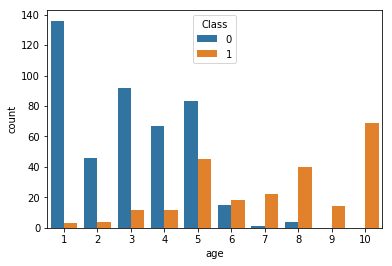

In [6]:
#tüm veriler sayısal olsa bile categorik olduğu için böyle bir görselleştirme uygulandı
sns.countplot(x='age', hue='Class', data=data)

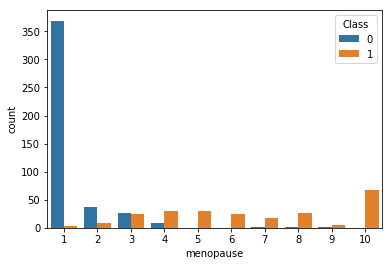

In [7]:
sns.countplot(x='menopause', hue='Class', data=data)

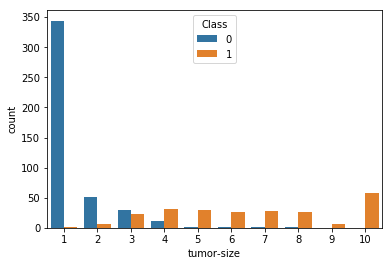

In [8]:
sns.countplot(x='tumor-size', hue='Class', data=data)

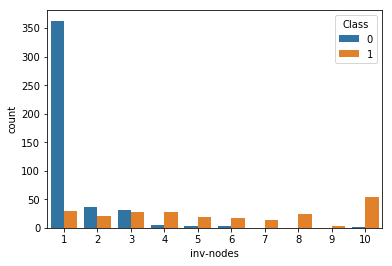

In [9]:
sns.countplot(x='inv-nodes', hue='Class', data=data)

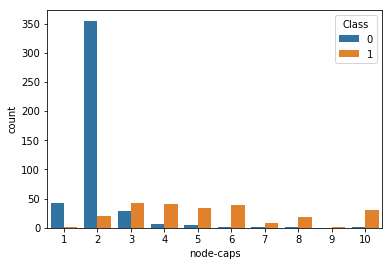

In [10]:
sns.countplot(x='node-caps', hue='Class', data=data)

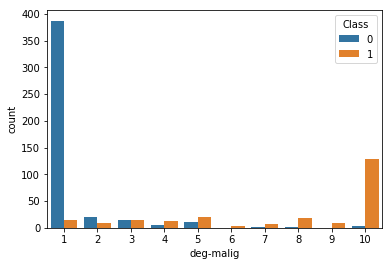

In [11]:
sns.countplot(x='deg-malig', hue='Class', data=data)

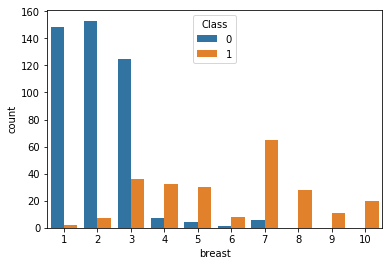

In [12]:
sns.countplot(x='breast', hue='Class', data=data)

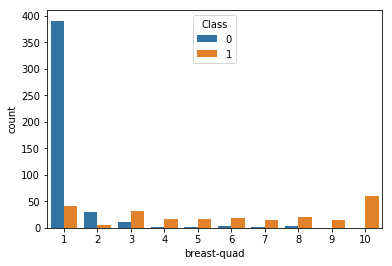

In [13]:
sns.countplot(x='breast-quad', hue='Class', data=data)

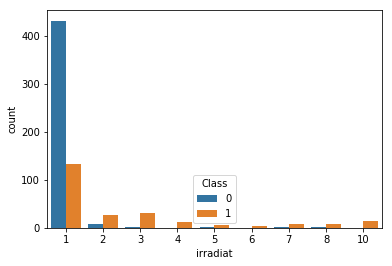

In [14]:
sns.countplot(x='irradiat', hue='Class', data=data)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (546, 9)
x test:  (137, 9)
y train:  (546,)
y test:  (137,)


In [16]:
#tüm veriler 1-10 arasında olduğu için min-max yerine standard scaler uyguladım her feature kendine özgü olsun diye
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [18]:
def model(model):
    model.fit(x_train,y_train) #modelin fit edilmesi
    pred=model.predict(x_test) #tahminlerin alınması
    print("train score",model.score(x_train,y_train) ) #eğitim skoru
    print("test score" , model.score(x_test,y_test)) #test skoru
    print(classification_report(y_test,pred)) #sınıflandırma raporunun elde edilmesi test ve tahmin sonuçlarına göre

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=[10], alpha=0.0001,max_iter=1000, random_state=0, activation='relu' ) 
#hidden layer size, alpha ve maz iteration parametreleri üzerinde işlem yapılacaktır
model(mlp)

train score 0.9743589743589743
test score 0.9562043795620438
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        87
          1       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       137



In [23]:
mlp = MLPClassifier(hidden_layer_sizes=[10], alpha=0.001,max_iter=1000, random_state=0, activation='relu' )
model(mlp)
#alpha değişimi değişiklik yapmamıştır

train score 0.9743589743589743
test score 0.9562043795620438
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        87
          1       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       137



In [25]:
mlp = MLPClassifier(hidden_layer_sizes=[100], alpha=0.001,max_iter=1000, random_state=0, activation='relu' )
model(mlp)
#hidden layer size kullanımı daha iyi sonuç getirdi

train score 0.989010989010989
test score 0.9781021897810219
             precision    recall  f1-score   support

          0       1.00      0.97      0.98        87
          1       0.94      1.00      0.97        50

avg / total       0.98      0.98      0.98       137



In [29]:
mlp = MLPClassifier(hidden_layer_sizes=[100], alpha=1,max_iter=1000, random_state=0, activation='relu' )
model(mlp)
#daha genel bir sonuç gelmesi ve classların başarılarının düzenlenmesi için alpha değeri daha çok yükseltildi

train score 0.9761904761904762
test score 0.9708029197080292
             precision    recall  f1-score   support

          0       0.99      0.97      0.98        87
          1       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       137

